In [132]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [133]:
# dataset phat

DATA_PHAT = '../dataset/'
DATA_PATH_TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

In [134]:
df_true = pd.read_csv(DATA_PHAT + DATA_PATH_TRUE, header=None)
df_noise1 = pd.read_csv(DATA_PHAT + DATA_PATH_NOISE1,header=None)
df_noise2 = pd.read_csv(DATA_PHAT + DATA_PATH_NOISE2,header=None)

In [135]:
df_true.head(5)

,0,1,2
0,0.00,17.49,17.04
1,2.12,17.65,17.17
2,3.06,17.70,17.24
3,4.16,17.73,17.33
4,4.93,17.75,17.39


In [136]:
df_noise1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.00,17.49,17.50,17.49,17.49,17.50,17.49,17.50,17.49,17.49,...,17.04,17.04,17.05,17.04,17.03,17.04,17.04,17.04,17.03,17.04
1,2.12,17.65,17.65,17.64,17.64,17.65,17.65,17.65,17.64,17.65,...,17.16,17.17,17.18,17.18,17.18,17.17,17.17,17.18,17.18,17.18
2,3.06,17.69,17.70,17.70,17.69,17.69,17.70,17.69,17.69,17.70,...,17.25,17.24,17.24,17.24,17.25,17.24,17.24,17.24,17.25,17.25
3,4.16,17.74,17.73,17.74,17.73,17.74,17.74,17.74,17.74,17.73,...,17.33,17.32,17.33,17.33,17.33,17.32,17.33,17.33,17.32,17.32
4,4.93,17.75,17.74,17.73,17.74,17.74,17.75,17.75,17.75,17.74,...,17.38,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39


In [137]:
df_noise2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.00,17.61,17.55,17.48,17.46,17.43,17.53,17.35,17.66,17.60,...,17.16,17.03,17.12,17.04,17.03,16.98,17.24,16.97,17.09,17.05
1,2.12,17.71,17.55,17.70,17.52,17.67,17.62,17.76,17.73,17.63,...,17.24,17.17,17.24,16.95,17.17,17.19,17.14,17.18,17.17,16.97
2,3.06,17.68,17.77,17.61,17.72,17.73,17.78,17.80,17.81,17.68,...,17.42,17.27,17.22,17.31,17.31,17.20,17.19,17.22,17.29,17.26
3,4.16,17.62,17.72,17.66,17.69,17.75,17.65,17.82,17.78,17.86,...,17.32,17.28,17.25,17.45,17.37,17.37,17.47,17.34,17.33,17.56
4,4.93,17.80,17.54,17.66,17.71,17.82,17.69,17.70,17.81,17.82,...,17.33,17.46,17.39,17.52,17.40,17.38,17.42,17.31,17.38,17.38


Text(0.5, 1.0, 'dataset: DS-5-1-GAP-0-1-N-0_v2.csv')

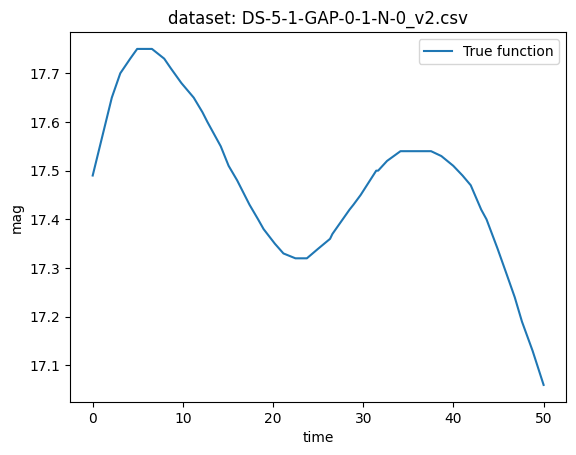

In [138]:
#true
plt.plot(df_true[0], df_true[1], label="True function")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("dataset: "+ DATA_PATH_TRUE)

# Polynomial regression on nonlinear data

In [139]:
def get_best_degree_to_polynomial_model(x, y, degrees):
    best_model = None
    best_degree = None
    best_y_pred_test = None
    best_MSE_test = float('inf')
    best_MSE_train = float('inf')
    MSE_list = []
    
    #true is test
    X_test = df_true[0]
    Y_test = df_true[1]

    x_test = X_test.to_numpy()[:, np.newaxis]
    y_test = Y_test.to_numpy()[:, np.newaxis]

    for degree in degrees:
        # create model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        #Training
        model.fit(x, y)  #get polynomial model for training data

        #Testing
        y_pred_train = model.predict(x) 
        y_pred_test = model.predict(x_test)

        MSE_train = mean_squared_error(y,y_pred_train)
        MSE_test = mean_squared_error(y_test,y_pred_test)
        MSE_list.append(MSE_test)
        # Update the best model if a lower MSE is found.
        if MSE_test < best_MSE_test:
                best_y_pred_test = y_pred_test
                best_MSE_train = MSE_train
                best_MSE_test = MSE_test
                best_degree = degree
                best_model = model
                

    return best_model, best_degree, best_MSE_test, best_MSE_train, best_y_pred_test, x_test, y_test, MSE_list

(50, 1)


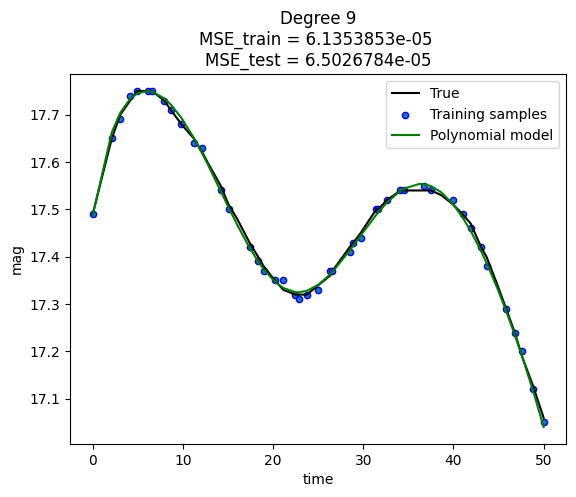

In [144]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
X = df_noise1[0]  #time
x = X.to_numpy()[:, np.newaxis]
Y = df_noise1[1]  #mag_A
y = Y.to_numpy()[:, np.newaxis]

degrees = list(range(1, 16))

best_model, best_degree, best_MSE_test, best_MSE_train, best_y_pred_test, x_test, y_test,MSE_list = get_best_degree_to_polynomial_model(x, y, degrees)

print(best_y_pred_test.shape)

plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, best_y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        best_degree, best_MSE_train, best_MSE_test))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

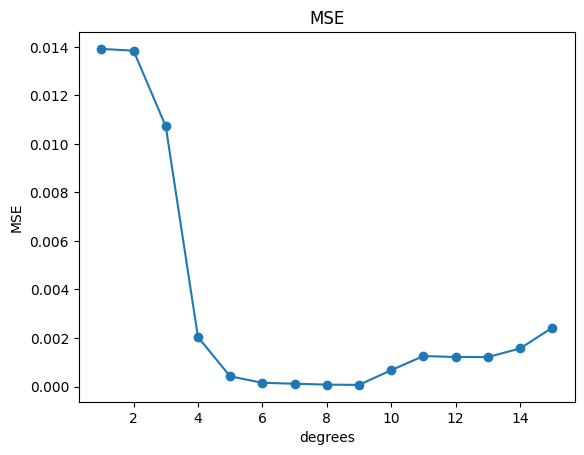

In [141]:
#plot all MSE
plt.plot(degrees, MSE_list, marker = 'o', linestyle= '-')
plt.xlabel('degrees')
plt.ylabel('MSE')
plt.title('MSE')
plt.show

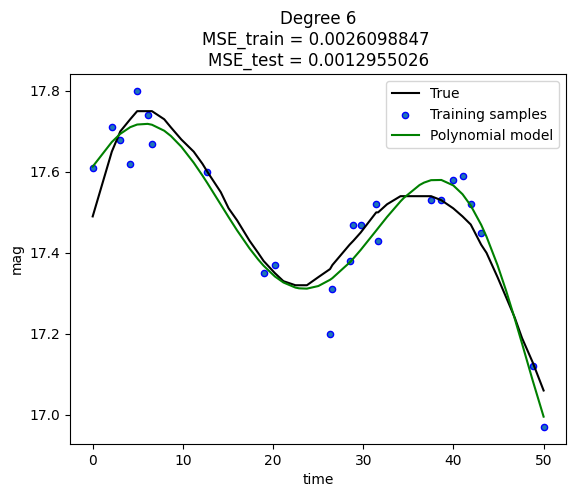

In [142]:
# DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'
X = df_noise2[0]  #time
x = X.to_numpy()[:, np.newaxis]
Y = df_noise2[1]  #mag_A
y = Y.to_numpy()[:, np.newaxis]

degrees = list(range(1, 16))

best_model, best_degree, best_MSE_test, best_MSE_train, best_y_pred_test, x_test, y_test, MSE_list = get_best_degree_to_polynomial_model(x, y, degrees)

plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, best_y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        best_degree, best_MSE_train, best_MSE_test))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

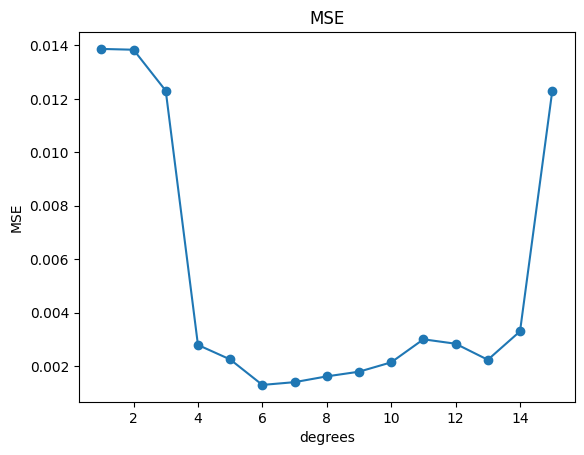

In [143]:
#plot all MSE
plt.plot(degrees, MSE_list, marker = 'o', linestyle= '-')
plt.xlabel('degrees')
plt.ylabel('MSE')
plt.title('MSE')
plt.show